# 3번 문제

MNIST 데이터와 CNN 알고리즘을 이용하여 데이터를 0~9 까지 분리하고 에포크는 40회로 지정하고, 5회 이상 성능이 개선되지 않으면 학습을 자동 중단하는 코드를 작성하시오. 

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

history = model.fit(
    x_train, y_train,
    epochs = 40,
    batch_size = 128,
    validation_split = 0.2,
    callbacks = [early_stopping],
    verbose = 1
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)
print(f"\nTest Accuracy: {test_acc:.4f}")

Epoch 1/40
375/375 [==============================] - 19s 49ms/step - loss: 0.3494 - accuracy: 0.8925 - val_loss: 0.0811 - val_accuracy: 0.9786
Epoch 2/40
375/375 [==============================] - 19s 51ms/step - loss: 0.1097 - accuracy: 0.9675 - val_loss: 0.0544 - val_accuracy: 0.9845
Epoch 3/40
375/375 [==============================] - 18s 47ms/step - loss: 0.0783 - accuracy: 0.9765 - val_loss: 0.0470 - val_accuracy: 0.9862
Epoch 4/40
375/375 [==============================] - 19s 51ms/step - loss: 0.0634 - accuracy: 0.9813 - val_loss: 0.0388 - val_accuracy: 0.9891
Epoch 5/40
375/375 [==============================] - 20s 53ms/step - loss: 0.0553 - accuracy: 0.9836 - val_loss: 0.0416 - val_accuracy: 0.9883
Epoch 6/40
375/375 [==============================] - 18s 47ms/step - loss: 0.0477 - accuracy: 0.9855 - val_loss: 0.0431 - val_accuracy: 0.9881
Epoch 7/40
375/375 [==============================] - 18s 49ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0345 - val_accuracy:

# 4번 문제
피마 인디언 데이터를 가지고,
  1) Plasma 와 당뇨병의 발병 여부를 알아보고 그 확률을 구하시오. 
  2) 상관관계를 나타내는 히트맵을 그리시오.
  3) 당뇨병을 예측하시오.

In [32]:
!pip install seaborn

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load
file_path = 'pima-indians-diabetes.csv'
data = pd.read_csv(file_path)

data.columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

# 1) Plasma 와 당뇨병의 발병 여부를 알아보고 그 확률을 구하시오.
glucose_outcome_prob = data.groupby('Glucose')['Outcome'].mean()
probability_table = glucose_outcome_prob.reset_index()
probability_table.columns = ['Glucose Level', 'Diabetes Probability']
pd.set_option('display.max_rows', None) 

glucose_prob_table

print(probability_table)

     Glucose Level  Diabetes Probability
0                0              0.400000
1               44              0.000000
2               56              0.000000
3               57              0.000000
4               61              0.000000
5               62              0.000000
6               65              0.000000
7               67              0.000000
8               68              0.000000
9               71              0.000000
10              72              0.000000
11              73              0.000000
12              74              0.000000
13              75              0.000000
14              76              0.000000
15              77              0.000000
16              78              0.250000
17              79              0.000000
18              80              0.166667
19              81              0.000000
20              82              0.000000
21              83              0.000000
22              84              0.100000
23              

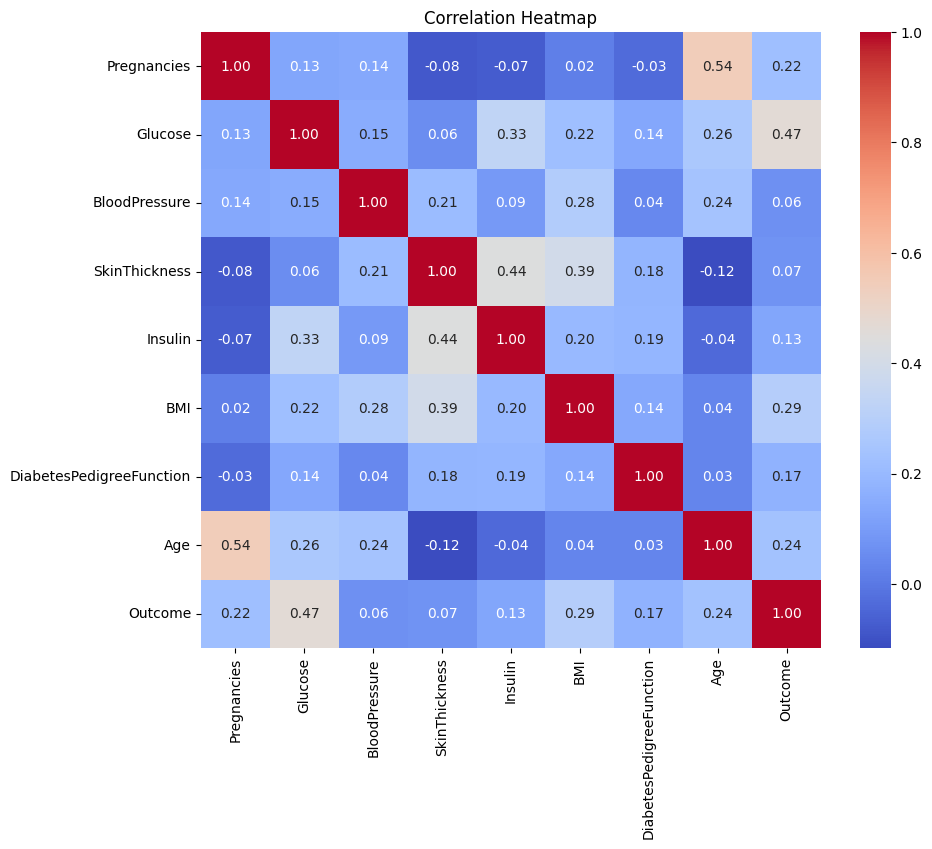

In [14]:
# 2) 상관관계를 나타내는 히트맵을 그리시오.
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# 3) 당뇨병을 예측하시오.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

best_model = grid_search.best_estimator_

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_output)


Model Accuracy: 0.6948051948051948

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.83      0.78       100
           1       0.59      0.44      0.51        54

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.64       154
weighted avg       0.68      0.69      0.68       154

